In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# https://aqibsaeed.github.io/2016-07-17-anomaly-detection/

In [188]:
df = pd.read_csv("spotify.csv")

In [190]:
df.head()

,#,id,Name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,1qvY1z3Wm3sAYeHfPTnrbI,La Muralla Verde,0.724,0.856,8,-6.119,0,0.0283,0.0653,0.000002,0.354,0.884,129.794,161800,4
1,1,2tgUxOJHTjFxKHmfhyZGuS,Por El Resto,0.548,0.969,9,-4.631,0,0.0539,0.0410,0.000039,0.303,0.892,136.958,265627,4
2,2,2vR0SW93BdIciNlqeJVSch,Te V? en un Tren,0.583,0.940,2,-4.637,1,0.0346,0.1170,0.000000,0.240,0.748,136.848,245267,4
3,3,4BlMZN5TUA3O1NbtnMZOEh,El Extra?o Del Pelo Largo,0.500,0.951,2,-4.849,1,0.0427,0.0341,0.000000,0.416,0.676,134.741,173867,4
4,4,09TTeexnlKewZdjOak2sV2,Nada Personal - Remasterizado 2007,0.758,0.935,8,-5.284,0,0.0517,0.4200,0.133000,0.114,0.436,124.372,292573,4


In [191]:
df["key"].value_counts()

9     28
7     27
4     27
2     25
0     25
11    16
1     15
5     13
6     12
8      9
10     6
3      5
Name: key, dtype: int64

In [192]:
df = df.drop("#", axis = 1)
df = df.drop("id", axis = 1)
df = df.drop("Name", axis = 1)
df = df.drop("duration_ms", axis = 1)
df = df.drop("time_signature", axis = 1)

In [193]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.724,0.856,8,-6.119,0,0.0283,0.0653,0.000002,0.354,0.884,129.794
1,0.548,0.969,9,-4.631,0,0.0539,0.0410,0.000039,0.303,0.892,136.958
2,0.583,0.940,2,-4.637,1,0.0346,0.1170,0.000000,0.240,0.748,136.848
3,0.500,0.951,2,-4.849,1,0.0427,0.0341,0.000000,0.416,0.676,134.741
4,0.758,0.935,8,-5.284,0,0.0517,0.4200,0.133000,0.114,0.436,124.372


In [91]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'lEnergy'],
      dtype='object')

In [134]:
df["lSpeechiness"] = df["speechiness"].apply(lambda x: np.log(x))

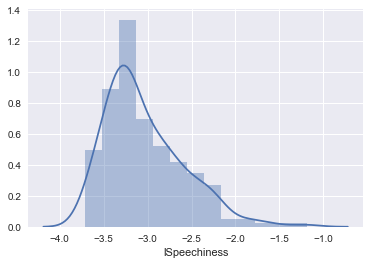

In [135]:
sns.distplot(df["lSpeechiness"])

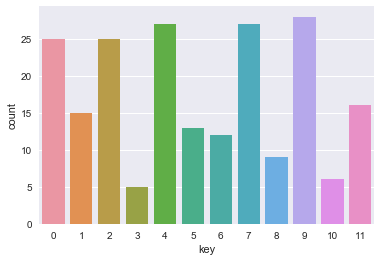

In [113]:
sns.countplot(df["key"])

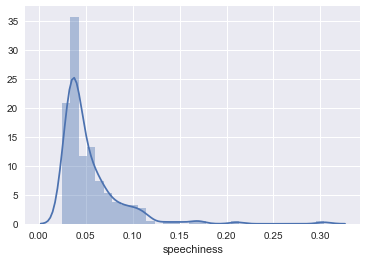

In [133]:
sns.distplot(df["speechiness"])

In [136]:
#df["lEnergy"] = df["energy"].apply(lambda x: x*x)
#df["lDanceability"] = df["danceability"].apply(lambda x: x*x)

In [194]:
from sklearn.preprocessing import StandardScaler

In [195]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [196]:
scaled_data = scaler.transform(df)

In [197]:
from sklearn.decomposition import PCA

In [198]:
pca = PCA(n_components=2)

In [199]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [200]:
x_pca = pca.transform(scaled_data)

In [201]:
scaled_data.shape

(208, 11)

In [202]:
x_pca.shape

(208, 2)

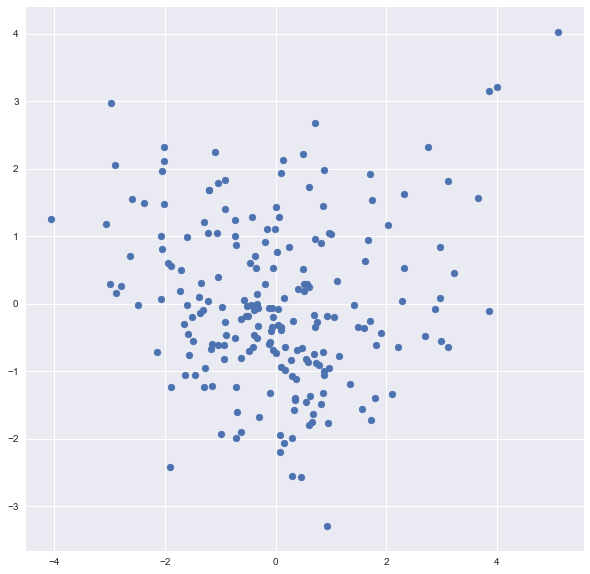

In [203]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1])

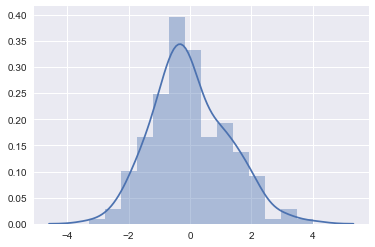

In [204]:
sns.distplot(x_pca[:,1])

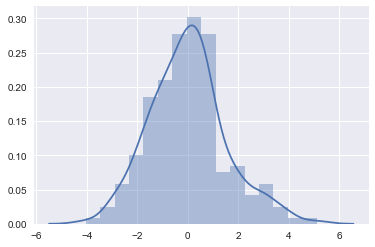

In [212]:
sns.distplot(x_pca[:,0])

In [206]:
ndf = pd.DataFrame(x_pca, columns =["p1", "p2"])

In [207]:
ndf.head()

,p1,p2
0,-0.050842,-0.689772
1,-1.557462,-0.761868
2,-0.920457,-0.268390
3,-1.704347,0.496971
4,0.596644,0.253221


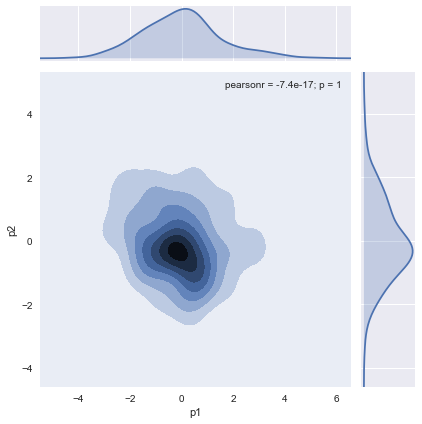

In [208]:
sns.jointplot(x= "p1", y= "p2", data=ndf, kind="kde");

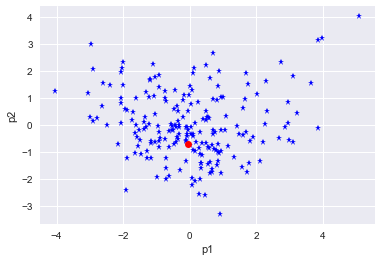

In [224]:
plt.figure() 
plt.xlabel("p1") 
plt.ylabel("p2") 
plt.plot(x_pca[:,0],x_pca[:,1], "b*")
plt.plot(x_pca[0,0],x_pca[0,1],"ro")
plt.show()

In [237]:
def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

In [242]:
from scipy.stats import multivariate_normal
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

In [243]:
def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(gt, predictions, average = "binary")
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    return best_f1, best_epsilon

In [244]:
mu, sigma = estimateGaussian(ndf)
p = multivariateGaussian(ndf,mu,sigma)

In [274]:
outliers = np.asarray(np.where(p < 0.003))

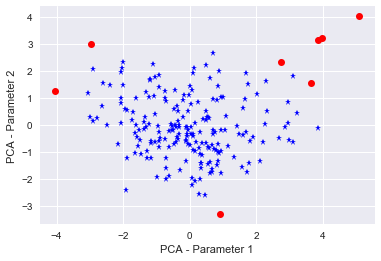

In [275]:
plt.figure() 
plt.xlabel("PCA - Parameter 1") 
plt.ylabel("PCA - Parameter 2") 
plt.plot(x_pca[:,0],x_pca[:,1],"b*")
plt.plot(x_pca[outliers,0],x_pca[outliers,1],"ro")
#plt.show()
plt.savefig('anomaly.png') 

In [267]:
plt.savefig('anomaly.png') 